In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from statistics import mean 
%matplotlib inline

"Unknown" function 

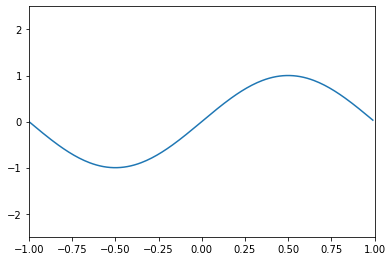

In [2]:
x = np.arange(-1,1,0.01)
y = np.sin(math.pi*x) 

fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5)) 
plt.plot(x,y)
plt.show()

Hypothesis

In [3]:
# H1: Set of all lines of the form h(x)=b  
def hipotesis1(X, Y):
    mpoint = ((X[0]+X[1])/2, (Y[0]+Y[1])/2)
    return mpoint

In [4]:
# H2: Set of all lines of the form h(x)=ax+b 
def hipotesis2(X,Y):
    x = np.arange(-1,1,0.01)
    m = (Y[1]-Y[0])/(X[1]-X[0])
    b = (-m*X[0])+Y[0]
    y = (m*x) + b
    return x,y,m,b

In [5]:
def average(lst): 
    avg = sum(lst)/ len(lst) 
    return avg

Experiment with 2 data points

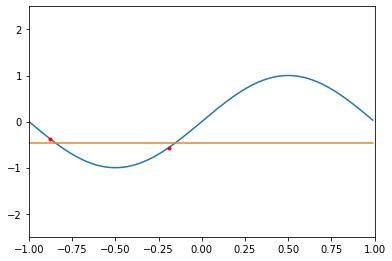

In [6]:
#Primer hipotesis con dos puntos
r1 = random.randrange(0,len(x)) 
r2 = random.randrange(0,len(x))
X = [x[r1], x[r2]]
Y = [y[r1], y[r2]]

mp = hipotesis1(X,Y)
g1 = [mp[1]]*len(x)
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))
axes.plot(x,y)
axes.plot(X,Y,'r.')
axes.plot(x,g1)

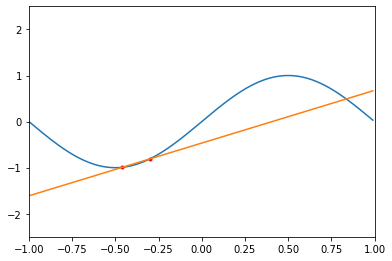

In [7]:
#Segunda hipotesis con dos puntos
r1 = random.randrange(0,len(x)) 
r2 = random.randrange(0,len(x))
X = [x[r1], x[r2]]
Y = [y[r1], y[r2]]
g2 = hipotesis2(X,Y)
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))
axes.plot(x,y)
axes.plot(X,Y,'r.')
axes.plot(g2[0],g2[1])


Repeating the experiment with 2 data points many times

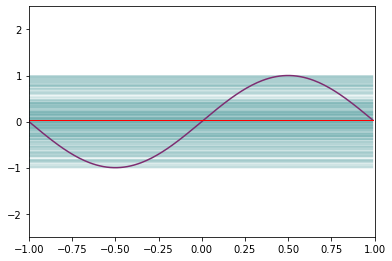

In [29]:
#Primer hipotesis
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))
i=0;
while(i<320):
    r1 = random.randrange(0,len(x)) 
    r2 = random.randrange(0,len(x))
    if (r1 == r2):
        r2 = random.randrange(0,len(x))  
    
    X = [x[r1], x[r2]]
    Y = [y[r1], y[r2]]
    mp = hipotesis1(X,Y)
    g1 = [mp[1]]*len(x)
    if (i == 0):
        g = [mp[1]]
    else:
        g.append(mp[1])
    axes.plot(x,g1,color='#549FA0',linewidth=0.20)
    i = i+1
axes.plot(x,y,color='#7E2D71',linewidth=1.5)
avg = average(g)
g_avg = [avg]*len(x)
axes.plot(x,g_avg,color='r',linewidth=1)

Variance: 0.25524832885166876
Bias: 0.5006151976646681


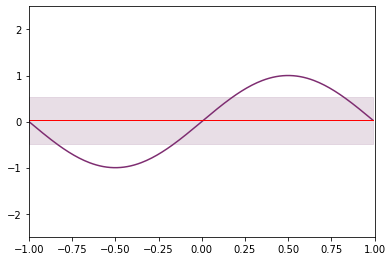

In [32]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))

sd = np.std(g)

y1 = g_avg + sd
y2 = g_avg - sd

axes.plot(x,y,color='#7E2D71',linewidth=1.5)
axes.plot(x,g_avg,color='r',linewidth=1)
plt.fill_between(x, y1, y2,alpha=0.5,color='#D2BECF')

va = np.var(g)
print('Variance: ' + str(va))
bias = np.power((g_avg-y),2)
print('Bias: ' + str(mean(bias)))

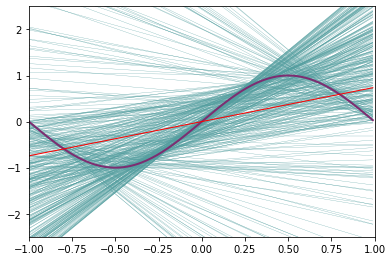

In [50]:
#Segunda hipotesis
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))
i=0;
g = []
while(i<400):
    r1 = random.randrange(0,len(x)) 
    r2 = random.randrange(0,len(x))
    if (r1 == r2):
        r2 = random.randrange(0,len(x))  
    X = [x[r1], x[r2]]
    Y = [y[r1], y[r2]]
    g2 = hipotesis2(X,Y)
    if (i == 0):
        g = [g2[1]]
        m = [g2[2]]
        b = [g2[3]]
    else:
        g.append(g2[1])
        m.append(g2[2])
        b.append(g2[3])
    axes.plot(g2[0],g2[1],color='#549FA0',linewidth=0.25)
    i = i+1
axes.plot(x,y,color='#7E2D71',linewidth=2)
avgm = average(m)
avgb = average(b)
g_avg = (avgm*x)
axes.plot(x,g_avg,color='r',linewidth=1)



Bias: 0.2111111975274705
Variance: 1.7421513368579997


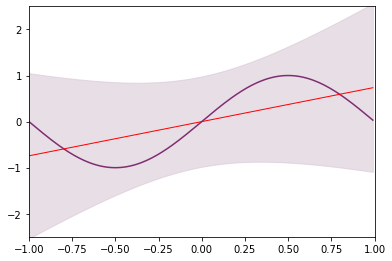

In [51]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set(xlim=(-1,1), ylim=(-2.5, 2.5))
g = np.array([np.array(xi) for xi in g])

sd = []
for i in range(0,len(g[0])):
    sd.append(np.std(g[:,i]))  
       
y1 = g_avg + sd
y2 = g_avg - sd
    
axes.plot(x,y,color='#7E2D71',linewidth=1.5)
axes.plot(x,g_avg,color='r',linewidth=1)
plt.fill_between(x, y1, y2,alpha=0.5,color='#D2BECF')

bias = np.power((g_avg-y),2)
print('Bias: ' + str(mean(bias)))
va = np.power(sd,2)
print('Variance: ' + str(mean(va)))